# Projet Expérimental - Sphère de fluide autogravitante

L'objectif de cette étude est de modéliser une sphère de fluide autogravitante composée d'hydrogène la plus réaliste possible à partir de nos connaissances actuelles, telle qu'une étoile comme le soleil. Dans un premier temps, une première approximation peut-être faite sur sa capacité à rayonner la chaleur alors négligeable entre son centre et sa surface, malgré l'extrême variation de température. De plus, le gaz peut-être considéré comme étant parfait dans un premier temps.

## 1/    Équation d'état
Pour commencer, il est nécessaire de dresser l'équation d'état du système ici considéré par un gaz parfait en transformation adiabatique vérifiant :
$$PV = nRT = NkT$$
ainsi que la loi de Laplace :
$$PV^\gamma = \text{constante},$$

où le volume permet de faire apparaître la densité $\rho$
$$V = \frac{m}{\rho}.$$

Le soleil étant un fluide polytropique, il est nécéssaire d'établir la relation entre la pression et la densité de la sphère en fonction de son rayon $r$. La loi de Laplace vérifie alors l'égalité entre le centre de l'énergie de l'étoile et toute sa définition dans l'intervalle $r \in [0, R]$ avec $R$ le rayon total de la sphère,
$$P\left(\frac{m}{\rho}\right)^\gamma = P_c\left(\frac{m}{\rho_c}\right)^\gamma,$$
et ainsi
$$\frac{P}{P_c} = \left(\frac{\rho}{\rho_c}\right)^\gamma.$$

L'équation d'état d'un fluide polytropique est alors retrouvée :
$$P = \kappa \rho^\gamma = P_c \left(\frac{\rho}{\rho_c}\right)^\gamma,$$
avec
$$\kappa = \frac{P_c}{{\rho_c}^\gamma}.$$

In [1]:
pressure = lambda density, density_c, pressure_c, polytropic_indice : pressure_c * (density / density_c) ** (1 + 1/polytropic_indice)

## 2/ Relation entre la densité et la température

Comme pour l'équation d'état, en établissant le rapport de l'équation de gaz parfaits à son expression au centre de la sphère :
$$\frac{P\frac{m}{\rho}}{P_c\frac{m}{\rho_c}} = \frac{NkT}{NkT_c},$$
cela conduit à :
$$\frac{P}{P_c} \frac{\rho_c}{\rho} = \frac{T}{T_c}.$$

D'après l'équation d'état, la relation entre la masse volumique et la température s'écrit alors

$$
    T = T_c\left(\frac{\rho}{\rho_c}\right)^{\gamma - 1} = T_c\sqrt[n]{\frac{\rho}{\rho_c}}.
$$

In [2]:
temperature = lambda density, density_c, Tc, polytropic_indice : Tc * (density / density_c) ** (1 / polytropic_indice)

## 3/ Connaissances

L'accélération gravitationnelle (pesanteur) déduite du potentiel gravitationnel $\phi$ s'écrit :
$$\vec{g} = -\overrightarrow{\nabla}\phi.$$

Où l'équation de Poisson affirme que :
$$\Delta \phi = -4\pi\rho G,$$

et donc 
$$\text{div}(\vec{g}) = \Delta \phi.$$

## 4/ Équation de Lane-Emden

L'équation de l'équilibre hydrostatique est donnée par :
$$\overrightarrow{\nabla}P = \rho \vec{g}.$$

La pression étant une fonction de la masse volumique, le gradient de pression peut s'écrire :
$$\overrightarrow{\nabla}P = \frac{dP}{d\rho} \overrightarrow{\nabla} \rho.$$

À l'aide de l'équilibre hydrostatique il est ainsi possible d'exprimer la pesanteur en fonction de la densité :
$$\vec{g} = \frac{1}{\rho}\frac{dP}{d\rho} \overrightarrow{\nabla} \rho.$$

L'objectif de cette démarche est de conduire à une équation permettant d'exprimer la densité de la sphère autogravitante. D'après l'équation de Poisson définie précédemment, cela donne:
$$\text{div}(\vec{g}) = \overrightarrow{\nabla}\cdot\left(\frac{1}{\rho}\frac{dP}{d\rho} \overrightarrow{\nabla} \rho\right) = \frac{1}{\rho}\frac{dP}{d\rho}\Delta\rho + \overrightarrow{\nabla}\rho\cdot\overrightarrow{\nabla}\left(\frac{1}{\rho}\frac{dP}{d\rho}\right) = -4\pi\rho G$$

Conduisant alors à
$$\Delta\rho + \overrightarrow{\nabla}\rho\cdot\overrightarrow{\nabla}\left(\frac{1}{\rho}\frac{dP}{d\rho}\right)\frac{1}{\frac{1}{\rho}\frac{dP}{d\rho}} = \frac{-4\pi G\rho}{\frac{1}{\rho}\frac{dP}{d\rho}}.$$

Or d'après l'équation d'état polytropique :
$$\frac{1}{\rho}\frac{dP}{d\rho} \propto \rho^{\gamma - 2}.$$

Cela conduit alors à l'équation de Lane-Emden généralisée :
$$\frac{\Delta\rho}{\rho} + (\gamma -2)\left(\frac{\overrightarrow{\nabla}\rho}{\rho}\right)^2 + \frac{4\pi G}{\frac{1}{\rho}\frac{dP}{d\rho}} = 0.$$

En admettant que la masse volumique peut s'écrire en fonction du rayon : $\rho(r)$
$$\rho = \rho_c\theta^n \qquad \Longrightarrow \qquad \theta^n = \frac{\rho}{\rho_c},$$

un changement de variable pour obtenir la longueur d'échelle est obtenu par :
$$\xi = r\sqrt{\frac{4\pi G {\rho_c}^2}{(n+1)P_c}}.$$

Permettant de transformer l'équation différentielle en une forme plus élégante :
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right) + \theta^n = \frac{d^2\theta}{d\xi^2} + \frac{2}{\xi}\frac{d\theta}{d\xi} + \theta^n = 0$$

In [3]:
density = lambda density_c, theta, polytropic_indice: density_c * theta ** polytropic_indice

## 5/ Résolution numérique de l'équation

*Afin de résoudre cette équation aux dérivées partielle d'ordre 2 non linéaire, la méthode de Runge-Kutta d'ordre 4 est choisie pour sa précision d'estimation.*


### Décomposition de l'équation

Pour cela, un changement de variable est effectué sur une dérivée d'ordre 1 :
$$\frac{d\theta}{d\xi} = \omega(\xi)$$

et l'équation de Lane-Emden peut alors s'écrire en une nouvelle équation d'ordre 1 :
$$\frac{d\omega}{d\xi} = -\frac{2}{\xi}\omega(\xi) - \theta^n.$$

Un système de deux équations d'ordre 1 selon $\xi$ peut alors être résolu pour $\theta$ et $\omega$
$$
\frac{d}{d\xi}
\begin{cases}
    \theta = \omega(\xi)\\
    \omega = -\frac{2}{\xi}\omega(\xi) - \theta^n.
\end{cases}
$$



### Conditions initiales

Afin de démarrer l'algorithme, les conditions initiales de l'équation sont données pour 
$$
\begin{cases}
    \theta(\xi=0) & = \;\theta(0) \; = \;1\\
    d_\xi \theta(\xi=0)&  = \;\omega(0) \; = \;0.
\end{cases}
$$


In [4]:
import numpy as np
from matplotlib import pyplot as plt

from rungekutta import RungeKutta
from styledata import beautify

def lane_emden(ydy, x_axis):
    '''
    Parameters :
    ------------
    ydy : array of both order 1 equations
    x_axis : xi
    '''

    [y0, dy0] = ydy
    
    dy = np.array(
        [
            dy0,
            (-2/x_axis) * dy0 - y0**n
        ]
    )
    
    return dy

# Configuration des constantes :
# -----------------------
n = 1.5              # indice polytropique
gamma = 1 + 1/n      # indice adiabatique

d = 1.3927e9         # diamètre du soleil
R = d / 2            # rayon du soleil
dR = 100e3            # spatial step

rho_c = 150e3        # densité au coeur du soleil
G = 6.674e-11        # constante gravitationnelle
P_c = 2.850e14       # pression au coeur du soleil
T_c = 15e6           # température au coeur du soleil

radius = np.arange(1e-15, R, dR)

# Changement de variable xi
alpha = np.sqrt( (4 * np.pi * G * rho_c ** 2) / ((n + 1) * P_c))
xi, dxi = radius * alpha, dR * alpha

In [5]:
rungekutta = RungeKutta(x=xi, dt=dxi, order=4)
[theta, dtheta] = rungekutta.compute(EDO=lane_emden, y0=np.array([1, 0]))

xi = xi[theta==theta]
radius = radius[theta==theta]
dtheta = dtheta[theta==theta]
theta = theta[theta==theta]


<ipython-input-4-20e724878304>:20: RuntimeWarning: invalid value encountered in double_scalars
  (-2/x_axis) * dy0 - y0**n


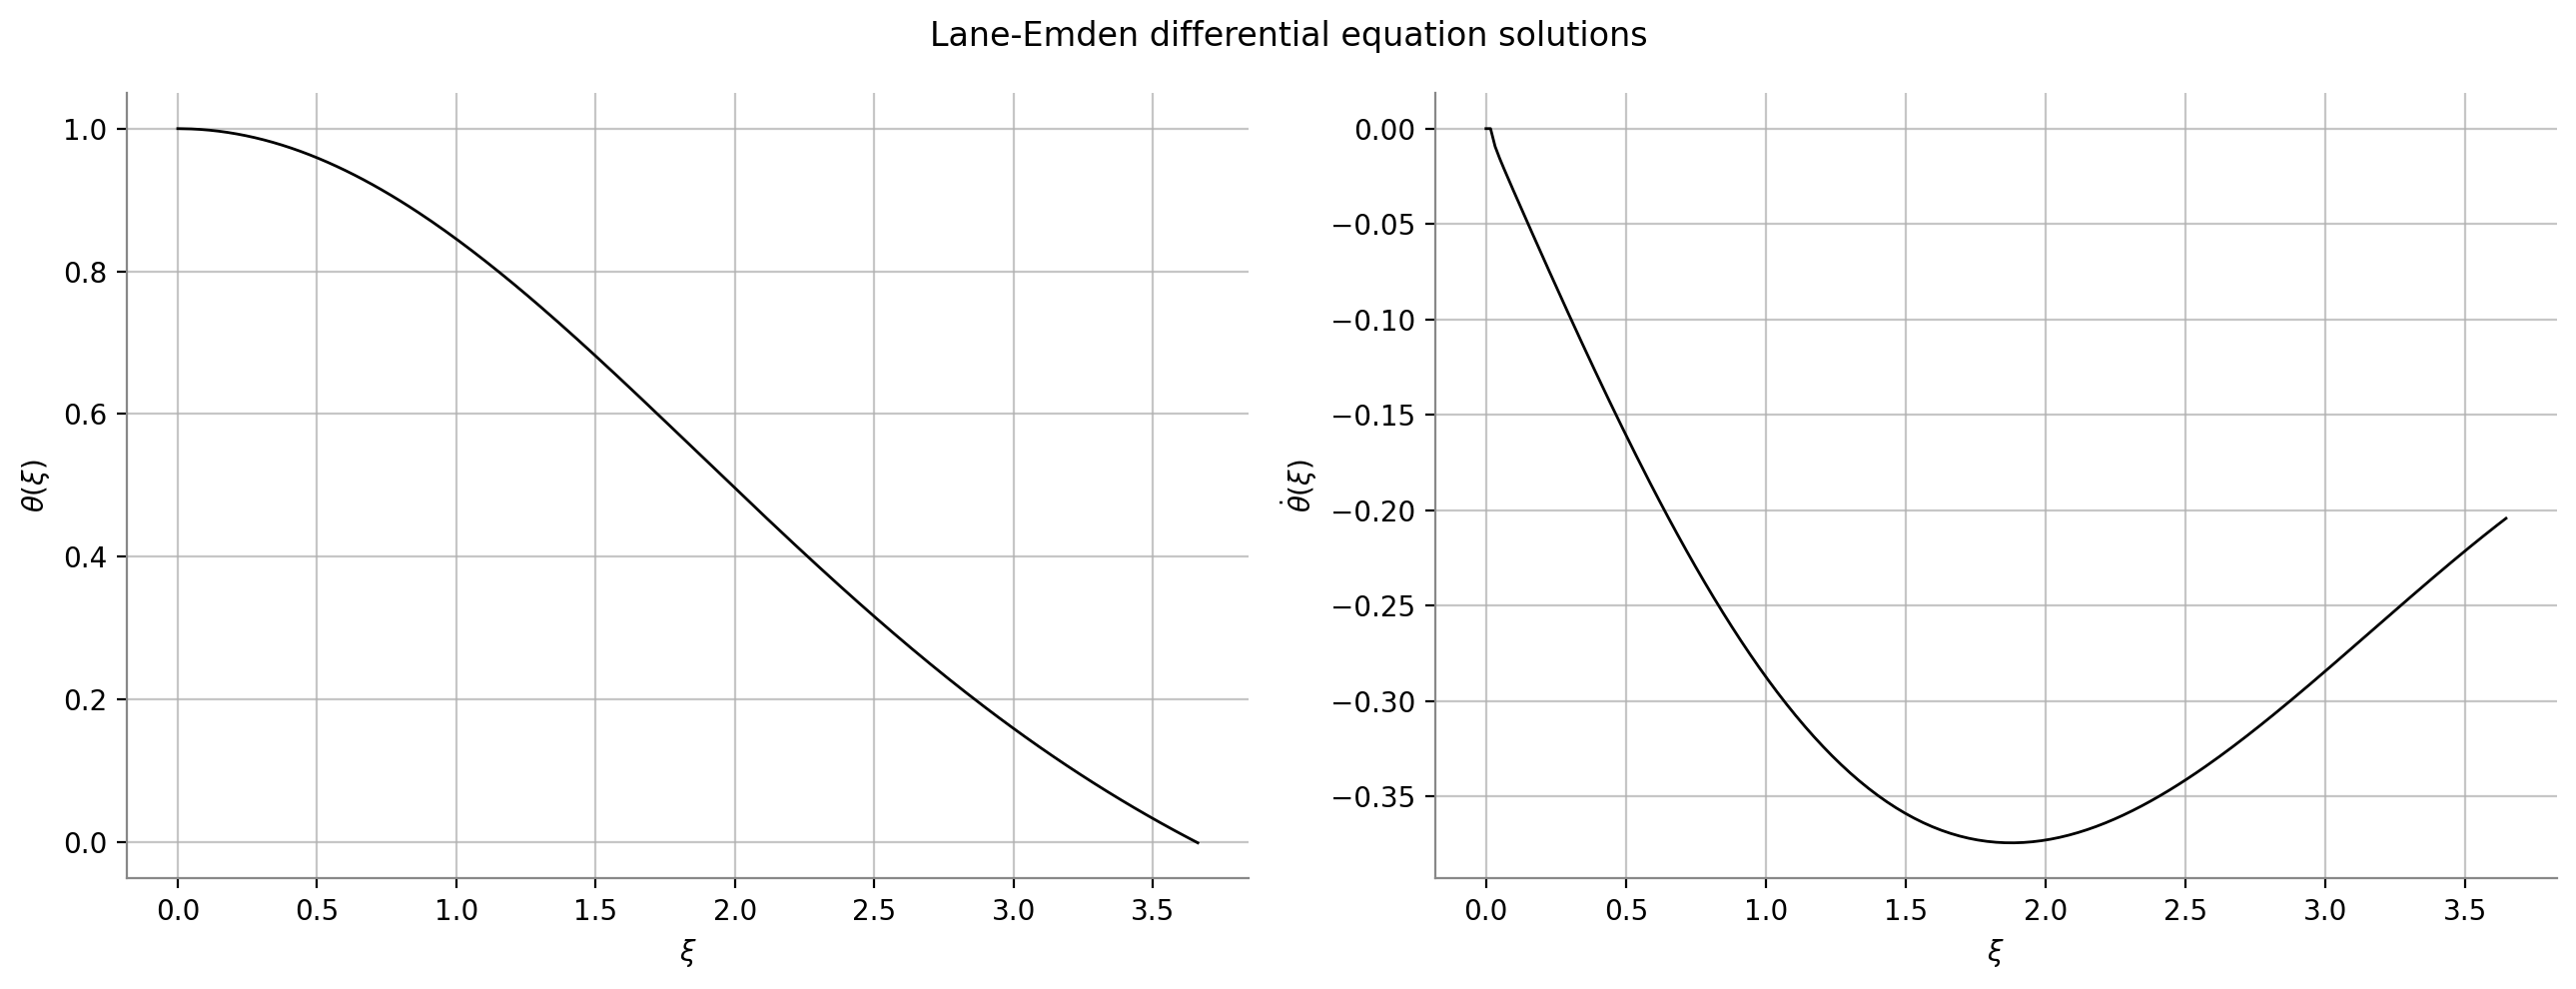

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), tight_layout=True, dpi=200)
fig.suptitle("Lane-Emden differential equation solutions")
ax[0].plot(xi, theta, color="black", linewidth=1.)
ax[0].set(ylabel=r"$\theta(\xi)$")
ax[1].plot(xi, dtheta, color="black", linewidth=1.)
ax[1].set(ylabel=r"$\dot{\theta}(\xi)$")
for a in ax:
    a.set(xlabel=r"$\xi$")
beautify(ax)
plt.show()

In [7]:
rho = density(density_c=rho_c, theta=theta, polytropic_indice=n)
P = pressure(density=rho, density_c=rho_c, pressure_c=P_c, polytropic_indice=n)

<ipython-input-3-75aa840df113>:1: RuntimeWarning: invalid value encountered in power
  density = lambda density_c, theta, polytropic_indice: density_c * theta ** polytropic_indice


La température est alors déduite :

In [8]:
T = temperature(density=rho, density_c=rho_c, Tc=T_c, polytropic_indice=n)

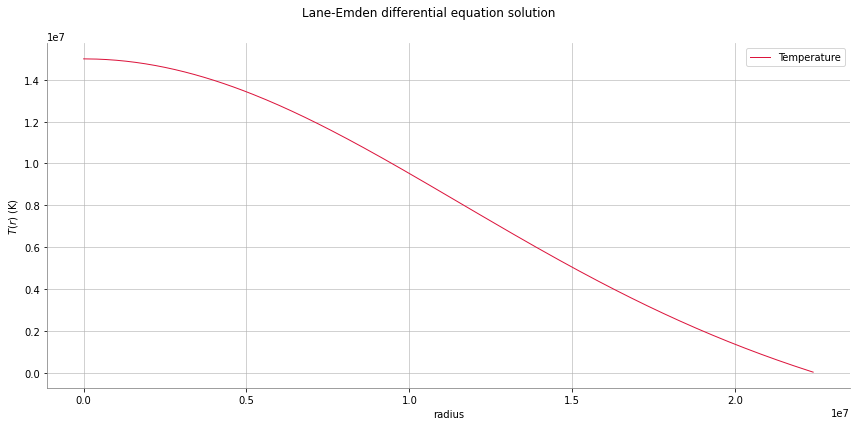

In [9]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
fig.suptitle("Lane-Emden differential equation solution")
ax.plot(radius, T, color="crimson", linewidth=1., label=r"Temperature")
ax.set(xlabel=r"radius", ylabel=r"$T(r)$ (K)")
beautify(ax, legend=True)
plt.show()

La pression peut également être calculée à partir de la densité :

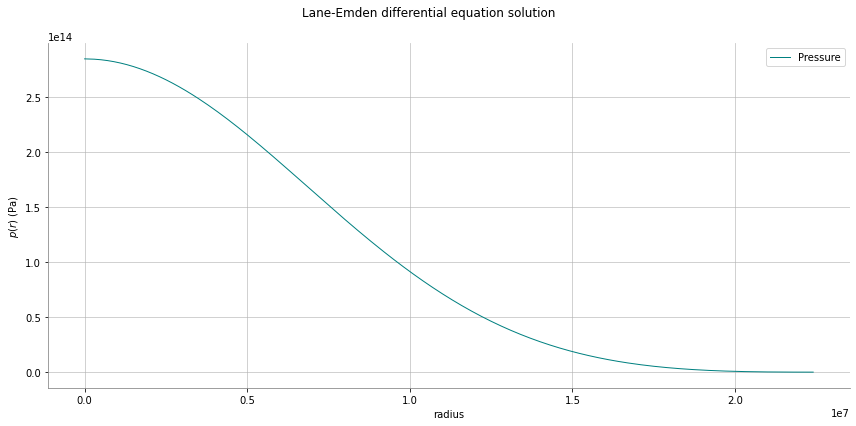

In [10]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
fig.suptitle("Lane-Emden differential equation solution")
ax.plot(radius, P, color="teal", linewidth=1., label=r"Pressure")
ax.set(xlabel=r"radius", ylabel=r"$p(r)$ (Pa)")
beautify(ax, legend=True)
plt.show()